In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import *
import random
import matplotlib.pyplot as plt
from operator import attrgetter
import matplotlib.pyplot as plt
import heapq
from operator import itemgetter
from pydub import AudioSegment # for audio
from pydub.playback import play # for audio

In [3]:
# Target & reward ------------------------------------------------------------------------

In [4]:
class Target:
    def __init__(self,name,x,y): # no indetermination in the target's position
        self.name = name
        self.x = x
        self.y = y

In [4]:
T = Target("T", 0.9, 0.5) # deep in the ocean

# for getting back to the beginning
T2 = Target("T2", 0.2, 0.5) # back to the ship

In [5]:
def reward(T, betax, betay):
    return 1 - ((T.x - betax)**2 + (T.y - betay)**2)**0.5
    # the closer the target, the less the distance, the higher the reward
    

In [6]:
# Obstacles ----------------------------------------------------------------------------

In [7]:
class Obstacle: # Just a point for now
    def __init__(self,name,x,y):
        self.name = name
        self.x = x
        self.y = y

In [8]:
O = Obstacle("Oo", 0.8, 0.2) # deep in the ocean

In [9]:
# Robots -------------------------------------------------------------------------------

In [10]:
class Robotx(object):
    _registry = []

    def __init__(self, name, alphax, betax, alphay, betay, gamma, delta, position):
        self._registry.append(self)
        self.name = name
        self.alphax = alphax
        self.betax = betax
        self.alphay = alphay
        self.betay = betay
        delta = reward(T, betax, betay)
        gamma = 1 - delta
        self.gamma = gamma
        self.delta = delta
        self.position = position # new -- I need it for sound

In [11]:
# arbitrary number of robots that, at the start, are uniformly distributed in the square of side length radius*2,
# centered in starting_cluster_coord
#
num_of_robots = 10
radius = 0.1
starting_cluster_coord = (0.2, 0.5)

a_x, a_y = 1-starting_cluster_coord[0]-radius, 1-starting_cluster_coord[0]+radius
b_x, b_y = 1-starting_cluster_coord[1]-radius, 1-starting_cluster_coord[1]+radius

for i in range(num_of_robots):
    x = random.uniform(a_x,a_y)
    y = random.uniform(b_x,b_y)
    Robotx('R'+str(i), x, 1-x, y, 1-y, 1 - reward(T, 1-x, 1-y), reward(T, 1-x, 1-y), i+1) # I'm adding 'position'

In [12]:
# note: values are stored with full precision, rounding is done only on visualization (with :.2f)

for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.delta:.2f} {k.position}")

R0 0.11 0.60 0.80 0.20 1
R1 0.18 0.57 0.72 0.28 2
R2 0.29 0.41 0.62 0.38 3
R3 0.15 0.44 0.75 0.25 4
R4 0.11 0.55 0.79 0.21 5
R5 0.19 0.50 0.71 0.29 6
R6 0.17 0.44 0.73 0.27 7
R7 0.28 0.54 0.63 0.37 8
R8 0.16 0.47 0.74 0.26 9
R9 0.15 0.56 0.75 0.25 10


In [13]:
for k in Robotx._registry:
    print(f"{k.name} {k.delta:.2f}")

R0 0.20
R1 0.28
R2 0.38
R3 0.25
R4 0.21
R5 0.29
R6 0.27
R7 0.37
R8 0.26
R9 0.25


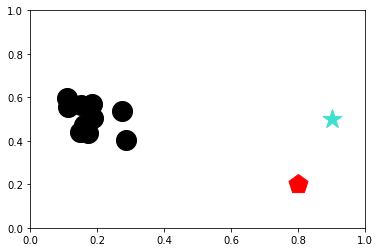

In [14]:
def plot_scatterplot():
    for i in  Robotx._registry:
        plt.scatter(i.betax, i.betay, s = 400, marker = 'o', color = 'black')
        
    plt.scatter(T.x, T.y, s = 400, marker = '*', color = 'turquoise')
    plt.scatter(O.x, O.y, s = 400, marker = 'p', color = 'red')

    plt.axis([0, 1, 0, 1])

    plt.show() 

plot_scatterplot()

In [15]:
# initialization of sound parameters


# we need 'append' to create such a list!

l = []
for x in range(11):
    value = AudioSegment.from_file("notes_/tC.mp3")
    l.append(value)
for i in range(11):
    print(l[i])
    
for k in Robotx._registry:
    print(k.position)
    
for k in Robotx._registry:
    print(l[k.position])

1
2
3
4
5
6
7
8
9
10


In [16]:
# audio block #1

# audio 1

# we can define "audio" as an attribute... no, better not.

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_1.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 


tC#
tD
tA#
tB
tC#
tD
tA#
tD
tB
tC#
Could not import the PyAudio C module '_portaudio'.


avplay version 12.3, Copyright (c) 2003-2018 the Libav developers
  built on Nov  2 2021 03:53:01 with Apple clang version 13.0.0 (clang-1300.0.29.3)
Failed to set value '-hide_banner' for option 'autoexit'


In [17]:
for r in Robotx._registry:
    if (r.delta < 0.5):
        print(f"{r.name} {r.delta:.2f} achtung!") # and start from this point to build the reshuffle section

R0 0.20 achtung!
R1 0.28 achtung!
R2 0.38 achtung!
R3 0.25 achtung!
R4 0.21 achtung!
R5 0.29 achtung!
R6 0.27 achtung!
R7 0.37 achtung!
R8 0.26 achtung!
R9 0.25 achtung!


In [18]:
# Reshuffling ----------------------------------------------------------------------------

In [19]:
# I'm adding this one as the only non-quantum thing:

result = all(i.delta < 0.8 for i in Robotx._registry)
  
# Printing result
print("Do all the robots have a reward lower than 0.8? : " + str(result))

# if True: reshuffle positions
# if False: do nothing

if result == True:
    flag = True
    while flag:
        flag = False
        for i in Robotx._registry:
            i.alphax = np.random.uniform(0,0.9)
            i.betax = 1 - i.alphax
            i.alphay = np.random.uniform(0,0.9)
            i.betay = 1 - i.alphay
            if (i.betax - O.x <= 0.2 and i.betay - O.y <= 0.2 <= 0.2):
                flag = True

Do all the robots have a reward lower than 0.8? : True


In [20]:
for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.position}")

R0 0.55 0.74 0.80 0.20 1
R1 0.29 0.48 0.72 0.28 2
R2 0.96 0.59 0.62 0.38 3
R3 0.18 0.89 0.75 0.25 4
R4 0.37 0.96 0.79 0.21 5
R5 0.74 0.65 0.71 0.29 6
R6 0.32 0.99 0.73 0.27 7
R7 0.92 0.97 0.63 0.37 8
R8 0.32 0.57 0.74 0.26 9
R9 0.38 0.66 0.75 0.25 10


In [22]:
for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = 1 - i.delta
    print(f"{i.name} {i.delta:.2f}")

R0 0.58
R1 0.39
R2 0.89
R3 0.18
R4 0.30
R5 0.78
R6 0.24
R7 0.53
R8 0.41
R9 0.45


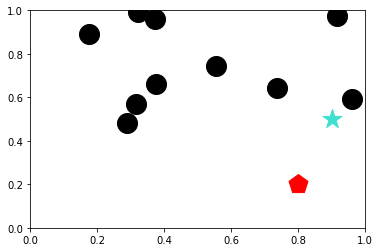

In [23]:
plot_scatterplot()

In [24]:
# audio block #2


# audio 2

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_2.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 

# I'm trying to use the same code, but saving the file as another one.

tG#
tA#
tF#
tD
tA
tG
tA
tF#
tA
tA
Could not import the PyAudio C module '_portaudio'.


avplay version 12.3, Copyright (c) 2003-2018 the Libav developers
  built on Nov  2 2021 03:53:01 with Apple clang version 13.0.0 (clang-1300.0.29.3)
Failed to set value '-hide_banner' for option 'autoexit'


In [25]:
# Quantum circuit construction ------------------------------------------------------------------

In [26]:
q = QuantumRegister(5, 'q') # qubits # changed to 9, formerly 15
m2 = ClassicalRegister(1, 'c1') # classical bits (separated is better)
m3 = ClassicalRegister(1, 'c2')
m4 = ClassicalRegister(1, 'c3')

qc3 = QuantumCircuit(q, m2, m3, m4) # to reach the target
qc4 = QuantumCircuit(q, m2, m3, m4) # to get back to the nest

In [27]:
# Which robot should enter the gate? -----------------------------------------------------------

In [28]:
def print_formatted_vector(*args):
    for vector in args:
        print("[" + "".join(f"{val:.2f} " for val in vector).strip() + "]")

In [29]:
# in case of ties on delta score, the max() function outputs the first maximum item it processes 
closest_robot = max(Robotx._registry, key=attrgetter('delta'))
print(f"Closest robot to the target: {closest_robot.name} {closest_robot.betax:.2f} {closest_robot.betay:.2f} {closest_robot.delta:.2f}")

# and then it enters the gate
vector0 = [closest_robot.alphax, closest_robot.betax]
vector1 = [closest_robot.alphay, closest_robot.betay]
vector3 = [closest_robot.gamma, closest_robot.delta]

normalized_v0 = vector0/np.linalg.norm(vector0)
normalized_v1 = vector1/np.linalg.norm(vector1)
normalized_v3 = vector3/np.linalg.norm(vector3)

print_formatted_vector(vector0, vector1, vector3)
print_formatted_vector(normalized_v0, normalized_v1, normalized_v3)

Closest robot to the target: R2 0.96 0.59 0.89
[0.04 0.96]
[0.41 0.59]
[0.11 0.89]
[0.04 1.00]
[0.57 0.83]
[0.12 0.99]


In [30]:
# Setting up |q_0> ------------------------------------------------------------------------------

In [31]:
# direct initialization with amplitudes vector
qc3.initialize(normalized_v0, q[0])
qc3.initialize(normalized_v1, q[1])
qc3.initialize(normalized_v3, q[2])

In [32]:
# this is the core code, and it is unchanged across time

qc3.barrier(q)
qc3.ccx(q[0],q[1],q[3])
qc3.ccx(q[0],q[1],q[4])

qc3.reset(q[3])
qc3.reset(q[4])

qc3.ccx(q[0],q[2],q[3]) 
qc3.ccx(q[1],q[2],q[4])

qc3.x(q[2])

qc3.ch(q[2],q[3])
qc3.ch(q[2],q[4])

qc3.x(q[2])

qc3.barrier(q)

# perform measurements and store them in classical bits

qc3.measure(q[2],m2[0])
qc3.measure(q[3],m3[0])
qc3.measure(q[4],m4[0])

# visualization of the ciruit

# qc3.draw(fold=-1, output="mpl")
# plt.show();

print(qc3)

      ┌──────────────────────────────┐ ░                                    »
 q_0: ┤ Initialize(0.040299,0.99919) ├─░───■────■─────────■─────────────────»
      ├─────────────────────────────┬┘ ░   │    │         │                 »
 q_1: ┤ Initialize(0.56508,0.82503) ├──░───■────■─────────┼────■────────────»
      ├─────────────────────────────┤  ░   │    │         │    │  ┌───┐     »
 q_2: ┤ Initialize(0.12484,0.99218) ├──░───┼────┼─────────■────■──┤ X ├──■──»
      └─────────────────────────────┘  ░ ┌─┴─┐  │       ┌─┴─┐  │  └───┘┌─┴─┐»
 q_3: ─────────────────────────────────░─┤ X ├──┼───|0>─┤ X ├──┼───────┤ H ├»
                                       ░ └───┘┌─┴─┐     └───┘┌─┴─┐     └───┘»
 q_4: ─────────────────────────────────░──────┤ X ├─|0>──────┤ X ├──────────»
                                       ░      └───┘          └───┘          »
c1: 1/══════════════════════════════════════════════════════════════════════»
                                                                

counts:  {'1 0 0': 4, '1 1 0': 6, '1 0 1': 2, '0 1 0': 4, '0 0 0': 3, '0 1 1': 282, '1 1 1': 723}


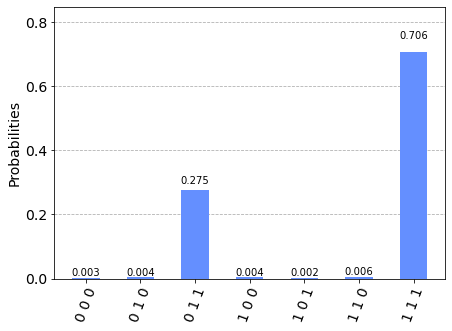

In [33]:
aer_sim = Aer.get_backend("aer_simulator")
transpiled_qc = transpile(qc3, aer_sim)
result = aer_sim.run(transpiled_qc).result()

counts = result.get_counts()
print("counts: ", counts)

plot_histogram(result.get_counts())

In [34]:
def eval_outcome(most_prob_dict, n_outcome):
    mapped_weights0 = list(map(lambda res: int(res[n_outcome*2])*most_prob_dict[res], most_prob_dict))
    return sum(mapped_weights0)/sum(most_prob_dict.values())

In [35]:
num_most_prob_states = 4

# https://docs.python.org/3/library/heapq.html: 
#
# heapq.nlargest(n, iterable, key=None) returns a list with the n largest element of iterable
#
most_prob_dict = dict(heapq.nlargest(num_most_prob_states, counts.items(), key=itemgetter(1)))
print(f"{num_most_prob_states} most probable states: {most_prob_dict}")

outcome0, outcome1 = eval_outcome(most_prob_dict, 0), eval_outcome(most_prob_dict, 1)

print(f"outcome0: {outcome0:.2f}\noutcome1: {outcome1:.2f}")


4 most probable states: {'1 1 1': 723, '0 1 1': 282, '1 1 0': 6, '1 0 0': 4}
outcome0: 0.72
outcome1: 1.00


In [36]:
# Setting new positions after the gate ---------------------------------------------------------------

In [37]:
for i in Robotx._registry:
    print(f"{i.name} {i.betax:.2f} {i.betay:.2f}")
    if (i.delta != closest_robot.delta or all(i.delta == j.delta for j in Robotx._registry)): # excluding the robot that entered the gate
        # CHANGE: but taking into account the case where all robots have the same reward!!!
        # for z
        #i.betaz = outcome0
        # the lower this value, the closer the robot to the 0, the higher alphaz
        #i.alphaz = round(1 - i.betaz, 3)
        # for y
        i.betay = outcome0 # changed this
        i.alphay = 1 - i.betay
        # for x
        i.betax = outcome1 # changed this
        i.alphax = 1 - i.betax

R0 0.55 0.74
R1 0.29 0.48
R2 0.96 0.59
R3 0.18 0.89
R4 0.37 0.96
R5 0.74 0.65
R6 0.32 0.99
R7 0.92 0.97
R8 0.32 0.57
R9 0.38 0.66


In [39]:
for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.position}")

R0 1.00 0.72 0.42 0.58 1
R1 1.00 0.72 0.61 0.39 2
R2 0.96 0.59 0.11 0.89 3
R3 1.00 0.72 0.82 0.18 4
R4 1.00 0.72 0.70 0.30 5
R5 1.00 0.72 0.22 0.78 6
R6 1.00 0.72 0.76 0.24 7
R7 1.00 0.72 0.47 0.53 8
R8 1.00 0.72 0.59 0.41 9
R9 1.00 0.72 0.55 0.45 10


In [40]:
# former rewards 
for i in  Robotx._registry:
    print(f"before the gate: {i.name} {i.delta:.2f}")

before the gate: R0 0.58
before the gate: R1 0.39
before the gate: R2 0.89
before the gate: R3 0.18
before the gate: R4 0.30
before the gate: R5 0.78
before the gate: R6 0.24
before the gate: R7 0.53
before the gate: R8 0.41
before the gate: R9 0.45


In [41]:
# new rewards
for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = 1 - i.delta
    print(f"after the gate: {i.name} {i.delta:.2f}")

after the gate: R0 0.76
after the gate: R1 0.76
after the gate: R2 0.89
after the gate: R3 0.76
after the gate: R4 0.76
after the gate: R5 0.76
after the gate: R6 0.76
after the gate: R7 0.76
after the gate: R8 0.76
after the gate: R9 0.76


In [42]:
# audio block #3

# audio 3

# we can define "audio" as an attribute... no, better not.

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_3.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 


tF#
tF#
tF#
tF#
tF#
tF#
tF#
tF#
tF#
tF#
Could not import the PyAudio C module '_portaudio'.


avplay version 12.3, Copyright (c) 2003-2018 the Libav developers
  built on Nov  2 2021 03:53:01 with Apple clang version 13.0.0 (clang-1300.0.29.3)
Failed to set value '-hide_banner' for option 'autoexit'


In [43]:
# Reach the most successful robot -------------------------------------------------------

In [44]:
# not for now

for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = (1 - i.delta, 3)
    
max_attr_ = max(Robotx._registry, key=attrgetter('delta'))
print(f"max_attr_.delta: {max_attr_.delta:.2f}")

for i in Robotx._registry:
    if (i.delta == max_attr_.delta):
        print(f"Most successful robot: {i.name} {i.betax:.2f} {i.betay:.2f} {i.delta:.2f}") # and then it enters the gate

for j in Robotx._registry:
    # to get other robots following it:
    if (j != max_attr_): # changed here
        flag = True
        while flag:
            flag = False
            j.alphax = max_attr_.alphax + np.random.uniform(0,0.01)
            j.betax = 1 - j.alphax
            j.alphay = max_attr_.alphay + np.random.uniform(0,0.01)
            j.betay = 1 - j.alphay
            if (j.betax - O.x <= 0.2 and j.betay - O.y <= 0.2):
                flag = True
                   
# recalculate the rewards here:

for k in  Robotx._registry: # recalculate the rewards
    k.delta = reward(T, k.betax, k.betay)
    k.gamma = 1 - k.delta
    print(f"{k.name} {k.delta:.2f}")

max_attr_.delta: 0.89
Most successful robot: R2 0.96 0.59 0.89
R0 0.89
R1 0.90
R2 0.89
R3 0.90
R4 0.90
R5 0.89
R6 0.90
R7 0.90
R8 0.89
R9 0.89


In [45]:
for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = 1 - i.delta
    print(f"{i.name} {i.delta:.2f}")

R0 0.89
R1 0.90
R2 0.89
R3 0.90
R4 0.90
R5 0.89
R6 0.90
R7 0.90
R8 0.89
R9 0.89


In [47]:
for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.delta:.2f} {k.position}")

R0 0.96 0.59 0.11 0.89 1
R1 0.96 0.58 0.10 0.90 2
R2 0.96 0.59 0.11 0.89 3
R3 0.96 0.58 0.10 0.90 4
R4 0.95 0.59 0.10 0.90 5
R5 0.95 0.59 0.11 0.89 6
R6 0.95 0.58 0.10 0.90 7
R7 0.96 0.59 0.10 0.90 8
R8 0.95 0.59 0.11 0.89 9
R9 0.96 0.59 0.11 0.89 10


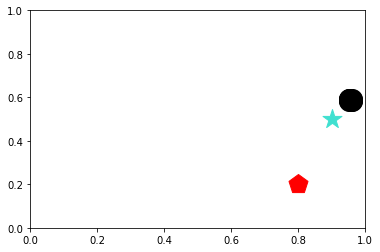

In [48]:
plot_scatterplot()

In [49]:
# audio block #4

# audio 4

# we can define "audio" as an attribute... no, better not.

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_4.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 


tF#
tF#
tF#
tF#
tF#
tF#
tF#
tF#
tF#
tF#
Could not import the PyAudio C module '_portaudio'.


avplay version 12.3, Copyright (c) 2003-2018 the Libav developers
  built on Nov  2 2021 03:53:01 with Apple clang version 13.0.0 (clang-1300.0.29.3)
Failed to set value '-hide_banner' for option 'autoexit'
